<a href="https://colab.research.google.com/github/codewithswatiee/DS-AI-ML/blob/main/PDFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import numpy as np

In [ ]:
L = []
for i in range(10000):
  a = random.randint(1, 6)
  b = random.randint(1, 6)

  L.append(a + b)

len(L)

10000

In [ ]:
L[:9]

[10, 2, 11, 10, 6, 7, 6, 9, 9]

<Axes: >

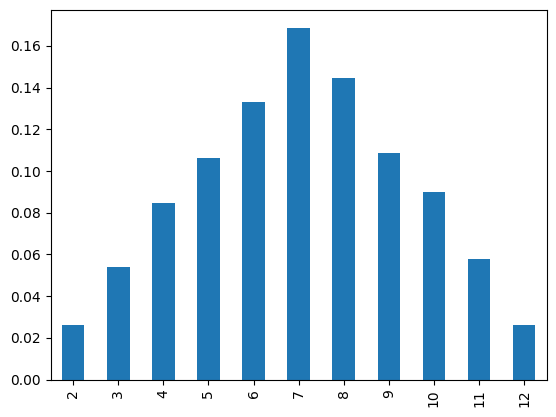

In [ ]:
prob_for_each_outcome = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
prob_for_each_outcome.plot(kind='bar')

<Axes: >

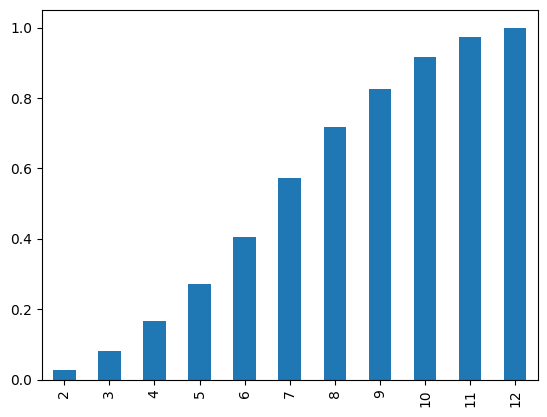

In [ ]:
np.cumsum(prob_for_each_outcome).plot(kind='bar')

## PDF => Parametric Density Estimation

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import normal

In [ ]:
sample = normal(loc=50, scale=5, size=1000)

(array([ 18.,  38., 107., 149., 210., 194., 159.,  91.,  28.,   6.]),
 array([35.8791976 , 38.74106462, 41.60293163, 44.46479865, 47.32666566,
        50.18853268, 53.05039969, 55.91226671, 58.77413372, 61.63600074,
        64.49786775]),
 <BarContainer object of 10 artists>)

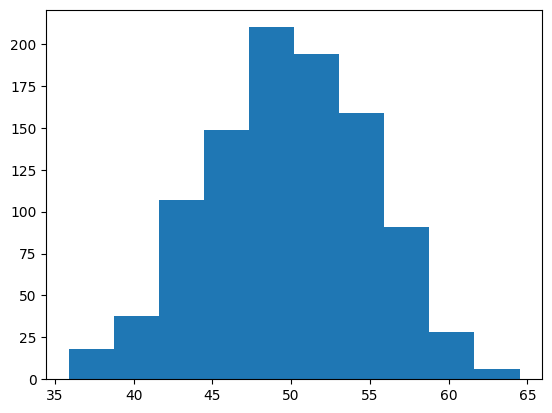

In [ ]:
plt.hist(sample, bins=10)

In [ ]:
sample_mean = sample.mean()
sample_std = sample.std()

In [ ]:
from scipy.stats import norm

dist = norm(sample_mean, sample_std)

In [ ]:
values = np.linspace(sample.min(), sample.max(), 100)

In [ ]:
probabilites = [dist.pdf(value) for value in values] #probability density
probabilites[:10]

[0.0020653351162319175,
 0.0023960141724117022,
 0.0027710010179461766,
 0.0031947173292018456,
 0.003671779892049087,
 0.0042069687909077145,
 0.004805188076801124,
 0.005471418578438173,
 0.006210662653628104,
 0.007027880836387557]

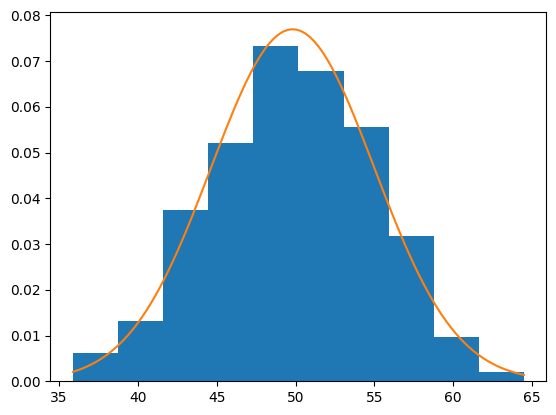

In [ ]:
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilites)

<ipython-input-14-8cd219d00d27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

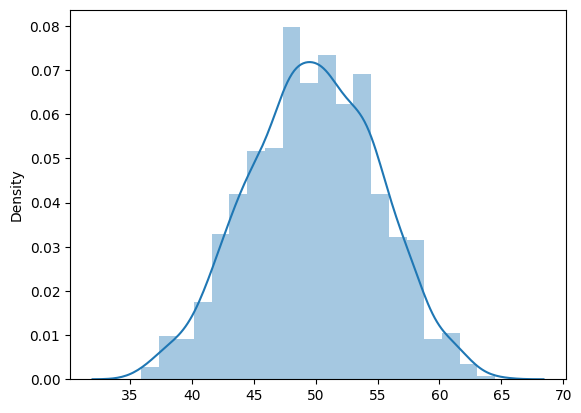

In [ ]:
import seaborn as sns
sns.distplot(sample)


## KDE

In [ ]:
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)

sample = np.hstack((sample1, sample2))
sample

array([ 7.49162595, 27.48533241, 13.59648215, 25.77955712, 25.74186263,
        8.30246885, 29.47296729, 21.6799237 , 24.07020614, 19.90379855,
       17.2770271 , 23.16683569, 16.07143975, 27.83639727, 20.70912091,
       13.86401548, 10.87291038, 21.76848695, 14.16234619, 17.42500444,
       26.66838779, 17.68334474, 20.05020793, 22.62301101, 24.54978057,
       17.36540916, 22.87363004, 23.38801078, 21.50128504, 13.75236028,
       21.04970436, 17.0224105 , 22.55462162, 18.5863437 , 18.59297007,
       21.26798026, 18.90239418, 27.39640418, 20.37606166, 21.17709403,
       26.96847718, 25.26683431, 25.49398069, 20.12012856, 24.30517235,
       32.1067057 , 27.48488401, 27.10307117, 16.07565957, 23.9658713 ,
       22.81548156, 17.71345884, 19.00162746, 21.76883937, 26.0561953 ,
        7.43239106, 20.78213368, 23.81395527, 18.13540772, 21.03019407,
       25.02168774, 18.70974034, 15.49455315, 26.19255417, 20.11249355,
       23.12513416, 19.55567281, 16.61981207, 12.13129849, 34.61

(array([ 5.,  0.,  5.,  5.,  7.,  2., 12.,  8., 18., 15., 25., 17., 27.,
        30., 15., 20., 22., 12., 17., 12., 10.,  9.,  9., 14., 21., 22.,
        27., 39., 36., 48., 69., 50., 61., 51., 59., 44., 28., 35., 26.,
        24., 13., 10.,  5.,  5.,  2.,  2.,  4.,  1.,  1.,  1.]),
 array([ 7.43239106,  8.42819321,  9.42399537, 10.41979752, 11.41559968,
        12.41140183, 13.40720398, 14.40300614, 15.39880829, 16.39461045,
        17.3904126 , 18.38621476, 19.38201691, 20.37781907, 21.37362122,
        22.36942338, 23.36522553, 24.36102769, 25.35682984, 26.35263199,
        27.34843415, 28.3442363 , 29.34003846, 30.33584061, 31.33164277,
        32.32744492, 33.32324708, 34.31904923, 35.31485139, 36.31065354,
        37.3064557 , 38.30225785, 39.29806   , 40.29386216, 41.28966431,
        42.28546647, 43.28126862, 44.27707078, 45.27287293, 46.26867509,
        47.26447724, 48.2602794 , 49.25608155, 50.25188371, 51.24768586,
        52.24348801, 53.23929017, 54.23509232, 55.23089448,

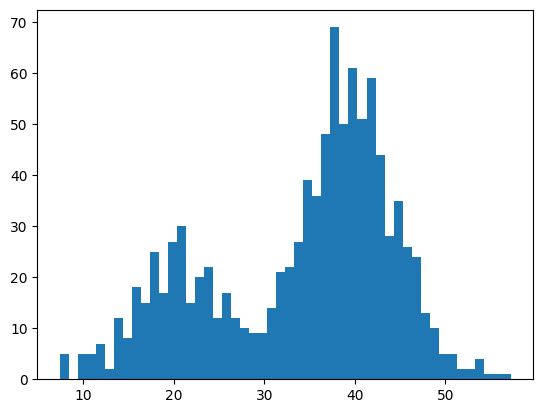

In [ ]:
plt.hist(sample, bins=50)

In [ ]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=3, kernel='gaussian')

sample = sample.reshape((len(sample)), 1) #convert data to 2d
model.fit(sample)

KernelDensity(bandwidth=3)

In [ ]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape((len(values)), 1)

In [ ]:
probabilites = model.score_samples(values)
probabilites = np.exp(probabilites)

probabilites[:10]


array([0.00205042, 0.00241463, 0.00281603, 0.00325655, 0.00373885,
       0.00426646, 0.00484357, 0.00547481, 0.00616471, 0.00691697])

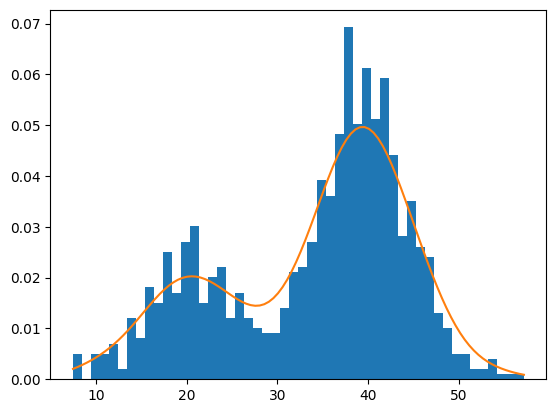

In [ ]:
plt.hist(sample, bins=50, density=True)
plt.plot(values, probabilites)

<Axes: ylabel='Density'>

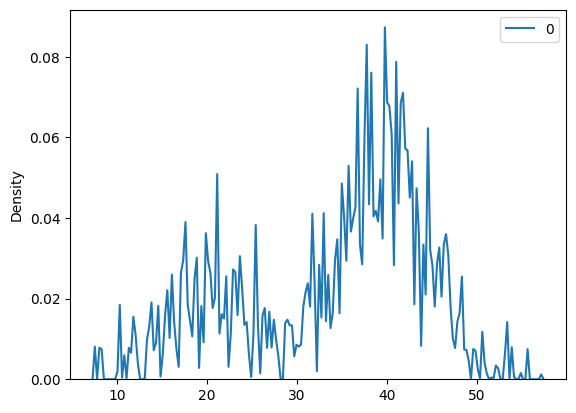

In [ ]:
sns.kdeplot(sample, bw_adjust=0.02)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


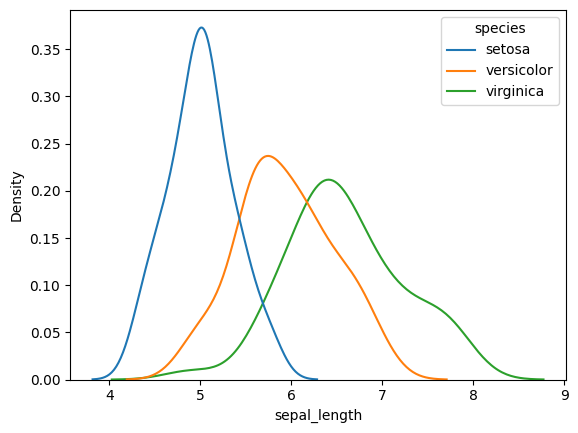

In [ ]:
sns.kdeplot(data=df, x='sepal_length', hue='species')
plt.show()

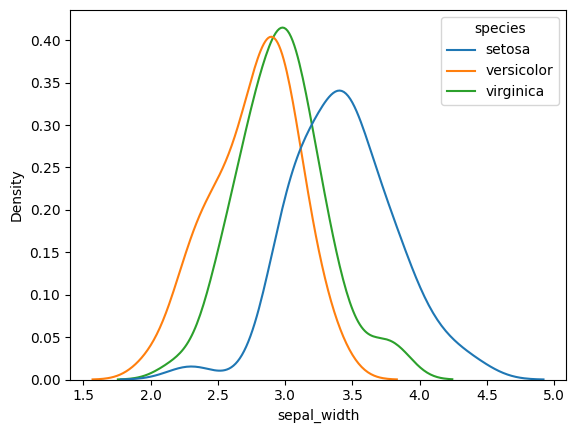

In [ ]:
sns.kdeplot(data=df, x='sepal_width', hue='species')
plt.show()

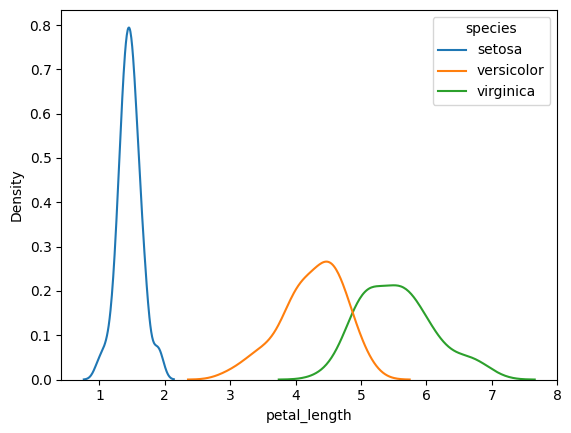

In [ ]:
sns.kdeplot(data=df, x='petal_length', hue='species')
plt.show()

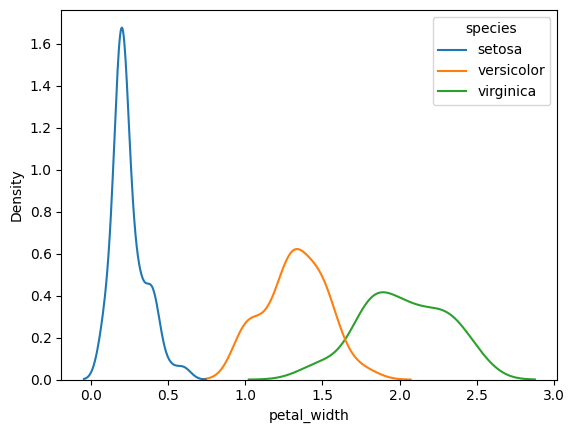

In [ ]:
sns.kdeplot(data=df, x='petal_width', hue='species')
plt.show()

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

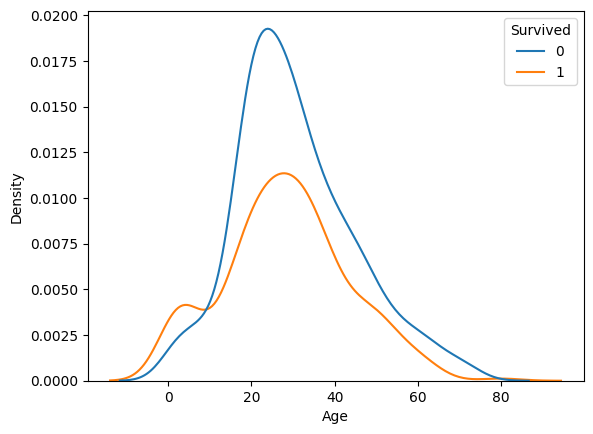

In [ ]:
sns.kdeplot(data=data, x='Age', hue='Survived')

<Axes: xlabel='petal_width', ylabel='Density'>

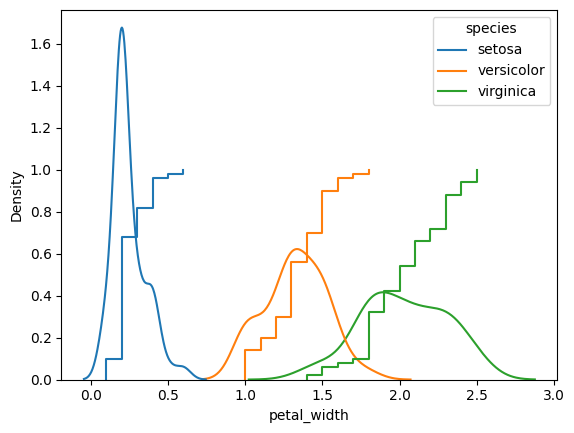

In [ ]:
sns.kdeplot(data=df, x='petal_width', hue='species')
sns.ecdfplot(data=df, x='petal_width', hue='species')

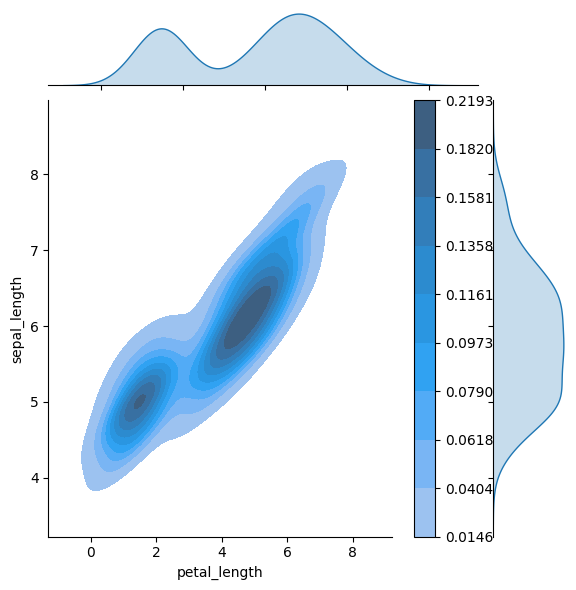

In [ ]:
sns.jointplot(data=df, x='petal_length', y='sepal_length', kind='kde', fill=True, cbar=True)

In [ ]:
age_column = (data['Age'] - data['Age'].mean()) / data['Age'].std()
print(age_column)
print(age_column.mean(), age_column.std())

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: Age, Length: 891, dtype: float64
2.388378943731429e-16 0.9999999999999994


<Axes: xlabel='Age', ylabel='Density'>

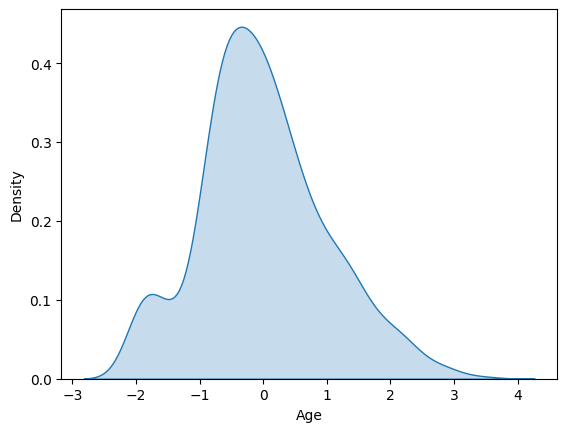

In [ ]:
sns.kdeplot(data=age_column, fill=True)

In [ ]:
data['Age'].skew() #almost symmetrical

0.38910778230082704

In [ ]:
data['Age'].mean() + 3*data['Age'].std()

73.27860964406095

In [ ]:
data['Age'].mean() - 3*data['Age'].std()

-13.88037434994331

In [ ]:
data[data['Age'] > 73] #outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [ ]:
temp = sorted(df['sepal_length'].tolist())
temp

[4.3,
 4.4,
 4.4,
 4.4,
 4.5,
 4.6,
 4.6,
 4.6,
 4.6,
 4.7,
 4.7,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.9,
 4.9,
 4.9,
 4.9,
 4.9,
 4.9,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.2,
 5.2,
 5.2,
 5.2,
 5.3,
 5.4,
 5.4,
 5.4,
 5.4,
 5.4,
 5.4,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.6,
 5.6,
 5.6,
 5.6,
 5.6,
 5.6,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.9,
 5.9,
 5.9,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.1,
 6.1,
 6.1,
 6.1,
 6.1,
 6.1,
 6.2,
 6.2,
 6.2,
 6.2,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.6,
 6.6,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.8,
 6.8,
 6.8,
 6.9,
 6.9,
 6.9,
 6.9,
 7.0,
 7.1,
 7.2,
 7.2,
 7.2,
 7.3,
 7.4,
 7.6,
 7.7,
 7.7,
 7.7,
 7.7,
 7.9]

In [ ]:
y_qunatile = []

for i in range(1, 101):
  y_qunatile.append(np.percentile(temp, i))

y_qunatile

[4.4,
 4.4,
 4.547,
 4.6,
 4.6,
 4.694,
 4.743,
 4.8,
 4.8,
 4.8,
 4.9,
 4.9,
 4.9,
 4.9,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.029,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.123,
 5.2,
 5.2,
 5.27,
 5.4,
 5.4,
 5.4,
 5.4,
 5.5,
 5.5,
 5.5,
 5.5,
 5.511,
 5.6,
 5.6,
 5.6,
 5.606999999999999,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.9,
 5.9,
 6.0,
 6.0,
 6.0,
 6.0,
 6.1,
 6.1,
 6.1,
 6.1,
 6.2,
 6.2,
 6.234,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.328,
 6.4,
 6.4,
 6.4,
 6.4,
 6.473000000000001,
 6.5,
 6.5,
 6.5200000000000005,
 6.6,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.763,
 6.8,
 6.8610000000000015,
 6.9,
 6.9,
 7.008000000000001,
 7.156999999999999,
 7.2,
 7.254999999999998,
 7.407999999999999,
 7.6530000000000005,
 7.7,
 7.7,
 7.9]

In [ ]:
samples = np.random.normal(loc = 0, scale=1 , size= 1000 )

In [ ]:
x_quantile = []
for i in range(1, 101):
  x_quantile.append(np.quantile(samples, i/100))

x_quantile

[-2.444537519936855,
 -2.099176517714829,
 -1.8963019619686399,
 -1.756451875631895,
 -1.629510848669379,
 -1.5557315643519087,
 -1.4920134523095872,
 -1.4177244856527835,
 -1.3543940881428986,
 -1.313157927114395,
 -1.2555216727910559,
 -1.192224936522114,
 -1.123811398250338,
 -1.0695414148264253,
 -1.0180530267971577,
 -0.992403291844004,
 -0.9378229049545008,
 -0.9129744429702397,
 -0.8783205053768887,
 -0.8412811957357338,
 -0.8162761246133889,
 -0.7942747418456212,
 -0.7704477318974432,
 -0.7460724988496685,
 -0.7295279158277924,
 -0.6899882904869187,
 -0.6658222958097105,
 -0.6346561684647523,
 -0.5937847703643374,
 -0.5716277240139035,
 -0.5418840955965396,
 -0.5189011299165186,
 -0.49129581418338625,
 -0.45298421736656974,
 -0.42040453005288997,
 -0.3791049328665969,
 -0.3511031248131839,
 -0.32545182685619894,
 -0.3014909137082505,
 -0.2823510109407947,
 -0.2620852455358654,
 -0.2299905939705871,
 -0.2077565203863296,
 -0.18616613193931533,
 -0.16210737336294748,
 -0.14163207

<Axes: >

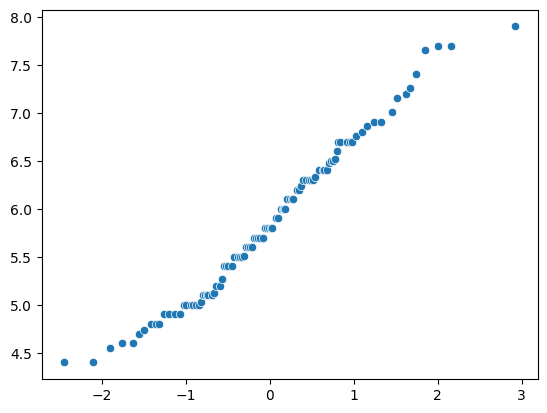

In [ ]:
sns.scatterplot(x=x_quantile, y=y_qunatile)

#### Directly using statsmodel (library)

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


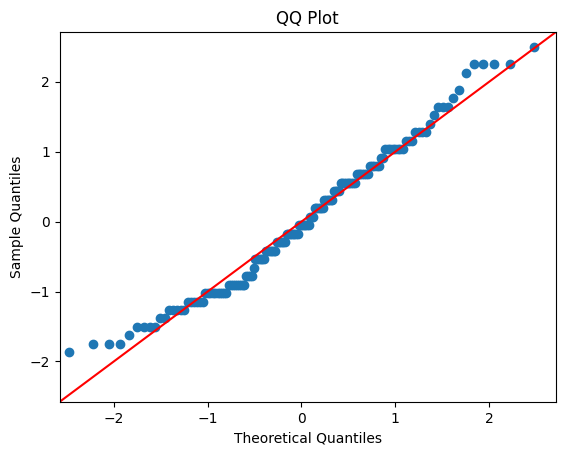

In [ ]:
fig = sm.qqplot(df['sepal_length'], line='45', fit=True)

plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

#### Does QQ plot only detect normal distribution?

In [ ]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
x = np.random.uniform(low=0, high =1, size =1000)

(array([ 90., 115.,  98.,  82., 122., 104., 106.,  96., 101.,  86.]),
 array([1.45500818e-04, 1.00010570e-01, 1.99875639e-01, 2.99740708e-01,
        3.99605778e-01, 4.99470847e-01, 5.99335916e-01, 6.99200985e-01,
        7.99066054e-01, 8.98931123e-01, 9.98796193e-01]),
 <BarContainer object of 10 artists>)

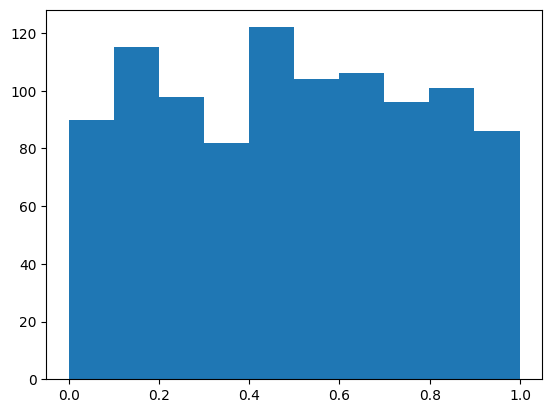

In [ ]:
plt.hist(x)

In [ ]:
# fit a uniform distrubution to the data
params = stats.uniform.fit(x)
dist = stats.uniform(loc=params[0], scale=params[1])

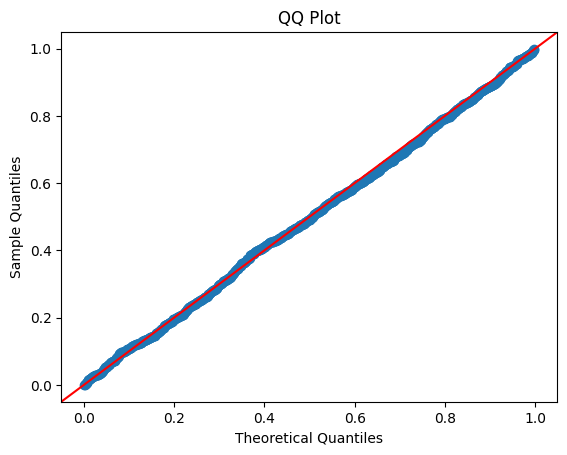

In [ ]:
fig = sm.qqplot(x, dist, line='45')

plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()